In [ ]:
import tensorflow as tf 

a = tf.constant(1234) 
b= tf.constant(6000) 

def op():  
  add_op = a + b 
  return add_op



tf.Tensor(7234, shape=(), dtype=int32)


In [ ]:
a= tf.constant(2) 
b= tf.constant(3)
c= tf.constant(4) 

calc1_op= a+b*c 
calc2_op= (a+b)*c  

#세션시작 
print(calc1_op)
print(calc2_op)


tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)


In [ ]:
## 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import tensorflow as tf


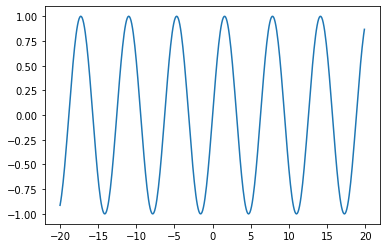

In [ ]:
x= np.arange(-20,20,0.1) 
y= np.sin(x) 
plt.plot(x,y)

In [ ]:
a= tf.constant(100) 
b= tf.constant(50) 

v= tf.Variable(0) 
v= a+b 

print(v)


tf.Tensor(150, shape=(), dtype=int32)


In [ ]:
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

In [ ]:
#colab은 Python 3.7을 사용 
#####################여기까지 코드테스트 

#상수 정의하기
a= tf.constant(120, name="a")
b= tf.constant(130, name="b")
c= tf.constant(140, name= "c")

#변수 정의하기 
v = tf.Variable(0, name="v") 

calc_op= a+b+c 
assign_op= tf1.assign(v,calc_op) 

sess= tf1.Session() 
sess.run(assign_op)
 
print(sess.run(v))


390


In [ ]:
#tensorflow 플레이스홀더 기능
#템플릿처럼 값을 넣을 공간을 만들어두는 기능 
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()  ##세션을 사용할 수 있도록 Version1을 로드 

#플레이스 홀더정의 
a= tf.placeholder(tf.int32,[3]) #정수자료형 3개를 가진 배열 
# [x,y,z]

#배열을 모든 값을 2배하는 연산을 정의
b= tf.constant(2) 
x2_op= a*b

#세션시작하기 
sess= tf.Session() 

#플레이스홀더에 값을 넣고 실행하기 
r1= sess.run(x2_op,feed_dict={a:[1,2,3]}) 
r2= sess.run(x2_op,feed_dict={a:[10,20,10]})
print(r1) #[2,4,6]
print(r2) #[20,40,20] 

[2 4 6]
[20 40 20]


In [ ]:
import tensorflow.compat.v1 as tf #텐서플로우 버전 1가동 
tf.disable_v2_behavior()  ##세션을 사용할 수 있도록 Version1을 로드 

a= tf.placeholder(tf.int32,[None]) #배열의 크기를 None으로 지정 
b= tf.constant(10) # 배열의 모든 값을 10배 연산하는 연산 정의하기 ㄷ
x10_op = a*b  

#세션시작 
sess=tf.Session() 

r1= sess.run(x10_op,feed_dict={a:[1,2,3,4,5]}) 
r2= sess.run(x10_op,feed_dict={a:[10,20]})
print(r1) 
print(r2)


[10 20 30 40 50]
[100 200]


In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow.compat.v1 as tf #텐서플로우 버전 1가동 
tf.disable_v2_behavior()  ##세션을 사용할 수 있도록 Version1을 로드 

##키, 몸무게, 레이블이 적힌 CSV 파일 읽기 
csv= pd.read_csv('/content/sample_data/bmi.csv')

#데이터를 정규화




,height,weight,label
0,135,58,fat
1,170,57,normal
2,194,41,thin
3,197,54,thin
4,125,73,fat
...,...,...,...
19995,132,43,normal
19996,168,64,normal
19997,131,41,normal
19998,191,63,thin


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [44]:
import pandas as pd 
import numpy as np 
import tensorflow.compat.v1 as tf #텐서플로우 버전 1가동 
tf.disable_v2_behavior()  ##세션을 사용할 수 있도록 Version1을 로드 

##키, 몸무게, 레이블이 적힌 CSV 파일 읽기 
csv= pd.read_csv('/content/sample_data/bmi.csv')

#데이터를 정규화
csv['height']=csv['height']/200 
csv['weight']=csv['weight']/100 

#레이블은 배열로.. 
bclass= {"thin":[1,0,0],"normal":[0,1,0],"fat":[0,0,1]}
csv["label_pat"] =csv["label"].apply(lambda x: np.array(bclass[x]))

#테스트를 위한 데이터분류  
test_csv= csv[15000:20000] 
test_pat= test_csv[["weight","height"]] 
test_ans =list(test_csv["label_pat"]) 

#데이터플로우 그래프 구축하기 
x= tf.placeholder(tf.float32, [None,2]) #키와 몸무게 
y_= tf.placeholder(tf.float32, [None,3]) #정답레이블용 3개값:Thin(1,0,0) normal(0,1,0) fat(0,0,1) 

#변수선언
W= tf.Variable(tf.zeros([2,3]))#가중치 
b= tf.Variable(tf.zeros([3])) #바이어스 

#소프트맥스 회귀 정의하기 
y=tf.nn.softmax(tf.matmul(x,W)+b) 

#모델훈련
cross_entropy= -tf.reduce_sum(y_*tf.log(y))
optimizer =tf.train.GradientDescentOptimizer(0.01)#학습계수(0.01) 오차범위에 대핟 최적화 
train= optimizer.minimize(cross_entropy)

#정답률구하기 
predict= tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy= tf.reduce_mean(tf.cast(predict, tf.float32))

#세션시작하기
sess= tf.Session() 
sess.run(tf.global_variables_initializer()) #변수초기화

##학습시키기
for step in range(3500): 
    i= (step *100 ) % 14000 
    rows= csv[1+i:1+i+100] 
    x_pat= rows[['weight','height']]
    y_ans= list(rows['label_pat']) 
    fd= {x:x_pat,y_:y_ans} 
    sess.run(train,feed_dict=fd)
    if step % 500 ==0: 
        cre= sess.run(cross_entropy, feed_dict=fd) 
        acc= sess.run(accuracy, feed_dict={x:test_pat,y_:test_ans})
        print("step=",step,"cre=",cre,"acc=",acc)

##최종적인 정답률 구하기
acc= sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
print("정답률:", acc) # 96% 정답률 


step= 0 cre= 108.76378 acc= 0.3784
step= 500 cre= 54.56773 acc= 0.8658
step= 1000 cre= 43.975098 acc= 0.9406
step= 1500 cre= 31.91398 acc= 0.9314
step= 2000 cre= 33.842674 acc= 0.9358
step= 2500 cre= 35.45199 acc= 0.936
step= 3000 cre= 33.959587 acc= 0.9684
정답률: 0.9682
